*Note : I am using a T4 GPU to speed up computations for this code*

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=fae24a2029f1cce62900aae7d853f71c3c55650b38c6c37c6715fce11ca77cbd
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import zipfile
import os
import wget

In [ ]:
url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
wget.download(url, 'rockpaperscissors.zip')

# Extract zip file
with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Define paths
base_dir = 'data/rockpaperscissors/rps-cv-images'

# Preprocessing Data

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # 40% validation data
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Modelling

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Compile Model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
# Train Model
callbacks = [
    EarlyStopping(patience=10, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
]

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
42/42 [==============================] - 34s 494ms/step - loss: 0.9640 - accuracy: 0.5030 - val_loss: 0.6534 - val_accuracy: 0.7357 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - 16s 377ms/step - loss: 0.4302 - accuracy: 0.8265 - val_loss: 0.2678 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 16s 376ms/step - loss: 0.2935 - accuracy: 0.8874 - val_loss: 0.2672 - val_accuracy: 0.9027 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 17s 399ms/step - loss: 0.2648 - accuracy: 0.9056 - val_loss: 0.2894 - val_accuracy: 0.8867 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 16s 373ms/step - loss: 0.2802 - accuracy: 0.8973 - val_loss: 0.3136 - val_accuracy: 0.9096 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 16s 374ms/step - loss: 0.2124 - accuracy: 0.9285 - val_loss: 0.1939 - val_accuracy: 0.9336 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - 16s 386ms/st

In [ ]:
# Evaluate Model
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

28/28 [==============================] - 7s 241ms/step - loss: 0.0403 - accuracy: 0.9886
Validation accuracy: 98.86%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
# Predict classes on validation set
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate classification report
target_names = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

28/28 [==============================] - 7s 246ms/step
              precision    recall  f1-score   support

       paper       0.33      0.33      0.33       284
        rock       0.36      0.36      0.36       290
    scissors       0.34      0.34      0.34       300

    accuracy                           0.34       874
   macro avg       0.34      0.34      0.34       874
weighted avg       0.34      0.34      0.34       874



Saving paper.jpg to paper (1).jpg
Saving cPuxKnJCdcTotM5k.png to cPuxKnJCdcTotM5k (2).png
Saving ADOiIs56eyYsunID.png to ADOiIs56eyYsunID (2).png
Saving C7zCG474LseZgn8o.png to C7zCG474LseZgn8o (2).png
1/1 [==============================] - 0s 20ms/step
The uploaded image paper (1).jpg is predicted to be: paper


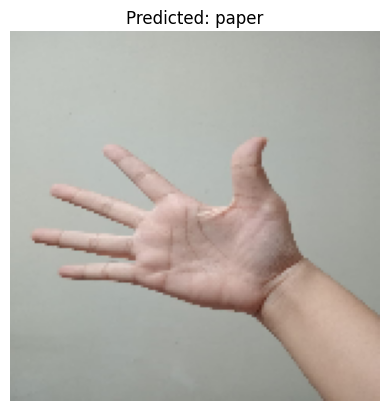

1/1 [==============================] - 0s 17ms/step
The uploaded image cPuxKnJCdcTotM5k (2).png is predicted to be: scissors


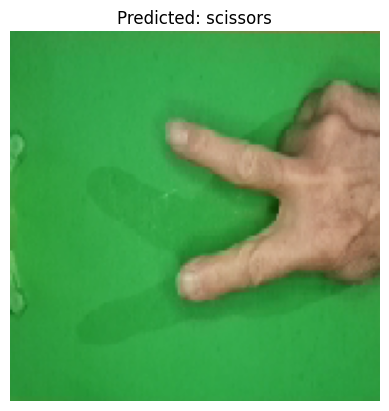

1/1 [==============================] - 0s 17ms/step
The uploaded image ADOiIs56eyYsunID (2).png is predicted to be: rock


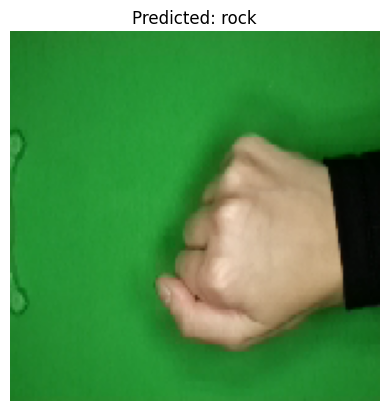

1/1 [==============================] - 0s 21ms/step
The uploaded image C7zCG474LseZgn8o (2).png is predicted to be: paper


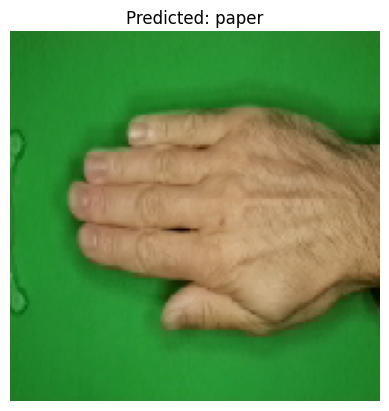

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

# Prediction on Uploaded Images
# Upload multiple images
uploaded = files.upload()

# Iterate through the uploaded images and predict each one
for img_path in uploaded.keys():
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    # Predict the class of the image
    prediction = model.predict(img_tensor)
    predicted_class = np.argmax(prediction[0])

    # Map predicted class to label
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]
    print(f'The uploaded image {img_path} is predicted to be: {predicted_label}')

    # Display the image with predicted label
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

>I also tried using an image that I took myself, and the model was able to predict correctly.